In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
driver = webdriver.Chrome(service = Service('../chromedriver_win32/chromedriver.exe'))

In [2]:
url = 'https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube'
driver.get(url)

In [29]:
soup = BeautifulSoup(driver.page_source)

In [45]:
ranking = soup.select('tr.aos-init')
len(ranking)

100

In [48]:
rank = 1
youtube_data = []
for i in ranking:
    subject = i.select('td.subject > p.category')[0].text.split('\n')[0] # 구분
    name = i.select('td.subject > a')[0].text.split('\t')[-8] # 이름
    subscriber = i.select('td.subscriber_cnt')[0].text
    view = i.select('td.view_cnt')[0].text
    video = i.select('td.video_cnt')[0].text
    youtube_data.append(['youtube_ranking',rank,subject,name,subscriber,view,video])
    rank += 1
youtube_Frame = pd.DataFrame(youtube_data,columns = ['구분','주제','순위','이름','구독자 수','시청자 수','비디오 갯수'])

In [62]:
df = pd.DataFrame(youtube_data,columns = ['sort','rank','category','name','subscriber','view','video'])

In [31]:
ranking


[<td class="subject">
 <h1>
 </h1><p class="category" href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                 
                                 </p>
 <a href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
 								
 								BLACKPINK							</a>
 <span>
 <i class="fa fa-comment"></i>
 								1							</span>
 <i aria-hidden="true" class="fa fa-heart"></i>
 <h2><span><a href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">"YG Entertainment" YG 와이지 K-pop BLACKPINK 블랙핑크 블핑 제니 로제 리사 지수 Lisa Jisoo Jennie ...</a></span></h2>
 <h3>
 <i class="fa fa-user"></i>
                             7130만<i class="fa fa-play"></i>220억2860만                            <i class="fa fa-video-camera"></i>
                             395                            <i class="fa fa-eye"></i>
                      

In [50]:
from matplotlib import rc, font_manager

In [51]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
# font_name
rc('font',family = font_name)

In [56]:
youtube_Frame

,sort,rank,category,name,subscriber,view,video
0,youtube_ranking,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개
1,youtube_ranking,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개
2,youtube_ranking,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개"
3,youtube_ranking,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개"
4,youtube_ranking,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...,...,...
95,youtube_ranking,96,[BJ/인물/연예인],허팝Heopop,385만,33억0441만,"1,912개"
96,youtube_ranking,97,[TV/방송],워크맨-Workman,381만,7억7678만,163개
97,youtube_ranking,98,[음악/댄스/가수],WINNER,381만,12억2780만,461개
98,youtube_ranking,99,[애완/반려동물],크림히어로즈,377만,14억3043만,"1,027개"


In [58]:
youtube_Frame['category'].value_counts()

[음악/댄스/가수]     37
[키즈/어린이]       22
[음식/요리/레시피]    14
[TV/방송]        13
[뉴스/정치/사회]      3
[BJ/인물/연예인]     3
[애완/반려동물]       2
[해외]            1
[미분류]           1
[회사/오피셜]        1
[패션/미용]         1
[게임]            1
[취미/라이프]        1
Name: category, dtype: int64

In [68]:
df['replaced_subscribe'] = df['subscriber'].str.replace('만','0000')
df.head()

,sort,rank,category,name,subscriber,view,video,replaced_subscribe
0,youtube_ranking,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개,71300000
1,youtube_ranking,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개,63600000
2,youtube_ranking,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개",62900000
3,youtube_ranking,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개",29700000
4,youtube_ranking,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [74]:
df['replaced_subscribe'] = df['replaced_subscribe'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sort                100 non-null    object
 1   rank                100 non-null    int64 
 2   category            100 non-null    object
 3   name                100 non-null    object
 4   subscriber          100 non-null    object
 5   view                100 non-null    object
 6   video               100 non-null    object
 7   replaced_subscribe  100 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


In [77]:
df.head()

,sort,rank,category,name,subscriber,view,video,replaced_subscribe
0,youtube_ranking,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개,71300000
1,youtube_ranking,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개,63600000
2,youtube_ranking,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개",62900000
3,youtube_ranking,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개",29700000
4,youtube_ranking,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [83]:
pivot_df = df.pivot_table(values = 'replaced_subscribe',
                index = 'category',
                aggfunc = ['sum','count']) # default = mean
pivot_df.head()

,sum,count
,replaced_subscribe,replaced_subscribe
category,,
[BJ/인물/연예인],13570000,3
[TV/방송],87520000,13
[게임],4260000,1
[뉴스/정치/사회],20430000,3
[미분류],6550000,1


In [89]:
pivot_df.columns = ['subscriber_sum','subscriber_count']
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,subscriber_count
0,[BJ/인물/연예인],13570000,3
1,[TV/방송],87520000,13
2,[게임],4260000,1
3,[뉴스/정치/사회],20430000,3
4,[미분류],6550000,1


In [94]:
pivot_df

,category,subscriber_sum,subscriber_count
0,[BJ/인물/연예인],13570000,3
1,[TV/방송],87520000,13
2,[게임],4260000,1
3,[뉴스/정치/사회],20430000,3
4,[미분류],6550000,1
5,[애완/반려동물],8080000,2
6,[음식/요리/레시피],92900000,14
7,[음악/댄스/가수],535880000,37
8,[취미/라이프],4000000,1
9,[키즈/어린이],163730000,22


In [108]:
pivot_df.sort_values(by = 'subscriber_sum',ascending = False,inplace = True) # ascending 오르다
pivot_df = pivot_df.reset_index(drop = True)
pivot_df

,category,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535880000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87520000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13570000,3
6,[애완/반려동물],8080000,2
7,[해외],7810000,1
8,[미분류],6550000,1
9,[회사/오피셜],5950000,1


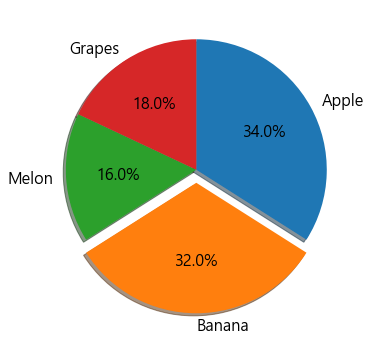

In [138]:
import matplotlib.pyplot as plt
## piechart
plt.rcParams['font.size'] = 16
ratio = [34,32,16,18]
labels = ['Apple','Banana','Melon','Grapes']
explodes = [0,0.1,0,0]
colors = ['#e042f5','#3a24c9','#4fed37','#de3207']

# plt.figure
plt.figure(figsize= (6,6))
plt.pie(ratio,labels = labels,
       autopct='%.1f%%',
        counterclock = False,
        startangle = 90,
        explode = explodes,shadow = True)
plt.show()

In [136]:
pivot_df.head(6)

,category,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535880000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87520000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13570000,3


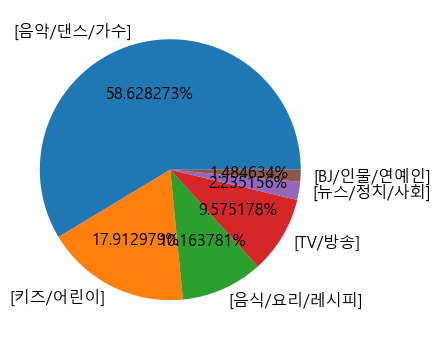

In [145]:
plt.figure(figsize = (6,6))
plt.pie(pivot_df.head(6)['subscriber_sum'],
       labels = pivot_df.head(6)['category'],
        autopct = '%1f%%'
       
       )
plt.show()